## Assignment 1: Math Foundation and Programming

This assignment intends to:
- Test your Python programming skills
- Understand gradients and backpropagation
- Think classical regression problems with a deep learning mind

- Suppose you have a model $\hat{y} = \sigma(z)$, where: 
    - $ z= w^T x + b,~i.e.~z=w_1*x_1+w_2*x_2+w_3*x_3+ w_4*x_4 + b$, 
    - $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{(1+e^{-z})}$, and
    - $w, b$ are parameters. $b$ is a scalar, $x,w~\in R^4$, specifically, $w = [w_1, w_2, w_3, w_4]^T$, $x = [x_1, x_2, x_3, x_4]^T$.
- Your ground truth lable $y=0~or~1$. With a sample $(x, y)$, You measure your model performance by two possible cost functions:
  - Squared error: $L=\frac{1}{2}(y-\hat{y})^2$
  - Cross entropy: $L=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$



Following the instruction below to program your solution in Python notebook step by step carefully:

**Q1**. Write a function to calculate each of the following partial derivatives. The inputs to the function can be all the variables in the model and the returned derivatives are expressions of these variables. An example is given below.
- `g_L_2_z(L, z, y, yhat, func)`: function to calculate $ \frac{\partial{L}}{\partial{z}}$. `func` is the name of the loss function
- `g_z_2_w(z, x, w )`: calculate $ \frac{\partial{z}}{\partial{w}}$
- `g_z_2_b(z, b )`: calculate $ \frac{\partial{z}}{\partial{b}}$

Note, these gradients are very simple. You really don't have to use gradient packages such as PyTorch.autograd. Just define each gradient as an expression of input variables.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def g_L_2_z(y, yhat, func):
    if func=='CrossEntropy':
        return yhat - y
    else:
        return (yhat-y) * yhat * (1-yhat)

def g_z_2_w(x):
    return x

def g_z_2_b():
    return 1

**Q2**. Write a forward pass function `forward(x, y, w, b, func)` to calculate variables $z, \hat{y}, L$, with given $x, y, w, b$

In [3]:
def forward(x, y, w, b, func):
    z = w.dot(x) + b
    
    yhat = 1/(1 + np.exp(-z))
    
    if func=='CrossEntropy':
        L = - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
    else:
        L = 0.5 * (y - yhat) * (y - yhat)
        
    return z, yhat, L

**Q3**. Write a function `gradient_desc (v, g, lr)` to adjust a parameter value $v$ by its gradient $g$, i.e. return the new value of parameter $v$ as $v$ $\leftarrow$ $v-lr*g$, where $lr$ is the learning rate.

In [4]:
def gradient_desc(v, dev, lr): # parameters: older weight/bias, derivative, learning rate
    return v - lr * dev

**Q4**. Write a function `train(x, y, w_0, b_0, func, lr, n)` as follows:
   1. Initialize $w$, $b$ with w_0, b_0
   2. Use a loop of $n$ rounds to do the following
       1. Call the forward function you defined in Q2 to calculate $z, \hat{y}, L$ 
       2. Apply backpropagation to calculate the partial derivatives $\frac{\partial{L}}{\partial{w}}, \frac{\partial{L}}{\partial{b}}$ using the functions you defined in Q1.
       3. Update $w, b$ using the function `gradient_desc` you defined in Q3
       4. record $\hat{y}$, $L$
   3. Return the history of $\hat{y}$, and $L$

In [5]:
def train(x, y, w0, b0, func, lr, n):
    w = w0
    b = b0
    C = []
    Yhat = []
    
    for i in range(n):
        
        z, yhat, L = forward(x, y, w, b, func)
        Yhat.append(yhat)
        C.append(L)
        
        g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x)
        g_b = g_L_2_z(y, yhat, func) * g_z_2_b()
        
        w = gradient_desc(w, g_w, lr)
        b = gradient_desc(b, g_b, lr)     
        
    return Yhat, C

**Q5**. Test your program with these two test cases and plot the history of loss $L$ (i.e. learning curves) under different loss functions. An example plot for case A has been given.
   
    


 **Case A**: $x=[[1.0,0.5,-1.0, -2.0]]^T, y=1, w_0=[-2,-2,1,2]^T, b_0=-1, lr = 0.01$

In [6]:
# Case A:

x=np.array([1.0,0.5,-1.0, -2.0])
y=1
w_0=np.array([-2,-2,1,2])
b_0=-1
lr = 0.01
n = 10

In [11]:
func = 'SquaredError'
Yhat2, C2 = train(x, y, w_0, b_0, func, lr, n)
for i,j in zip(Yhat2, C2):
    print(i,j)
# print(C2) 

0.00012339457598623172 0.4998766130371245
0.00012339567948361978 0.49987661193376326
0.00012339678300074094 0.49987661083038226
0.0001233978865375962 0.4998766097269816
0.00012339899009418553 0.4998766086235612
0.00012340009367050984 0.49987660752012103
0.00012340119726656957 0.49987660641666115
0.00012340230088236524 0.49987660531318157
0.00012340340451789722 0.4998766042096822
0.00012340450817316612 0.49987660310616316


Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Steps')

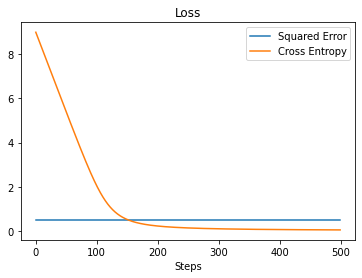

Text(0.5, 0, 'Steps')

Text(0.5, 1.0, 'Prediction')

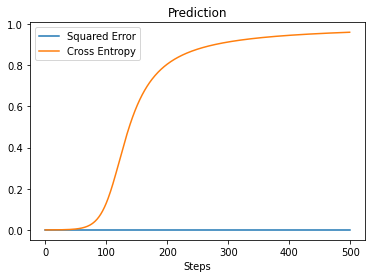

In [ ]:
func = 'CrossEntropy'
Yhat1, C1 = train(x, y, w_0, b_0, func, lr, n)

func = 'SquaredError'
Yhat2, C2 = train(x, y, w_0, b_0, func, lr, n)

plt.plot(range(n), C2, label="Squared Error")
plt.plot(range(n), C1, label="Cross Entropy")
plt.title('Loss')
plt.xlabel("Steps")
plt.legend()
plt.show()

plt.plot(range(n), Yhat2, label="Squared Error")
plt.plot(range(n), Yhat1, label="Cross Entropy")
plt.legend()
plt.xlabel("Steps")
# plt.ylim([-0.1, 1])
plt.title('Prediction')
plt.show()

**Case B**: $x=[-1.0,-0.5,-1.0, -2.0]^T, y=0, w_0=[-2,-2,1,-2]^T, b_0=-1,  lr = 0.01$

In [ ]:
# Case B:

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Steps')

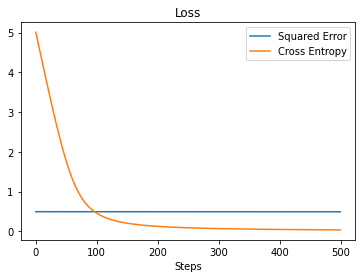

Text(0.5, 0, 'Steps')

Text(0.5, 1.0, 'Prediction')

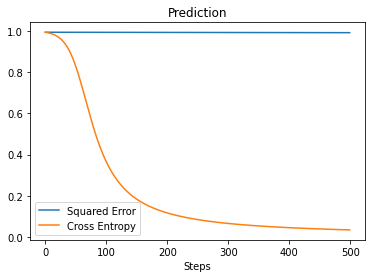

In [ ]:
func = 'CrossEntropy'
Yhat1, C1 = train(x, y, w_0, b_0, func, lr, n)

func = 'SquaredError'
Yhat2, C2 = train(x, y, w_0, b_0, func, lr, n)

plt.plot(range(n), C2, label="Squared Error")
plt.plot(range(n), C1, label="Cross Entropy")
plt.title('Loss')
plt.xlabel("Steps")
plt.legend()
plt.show()

plt.plot(range(n), Yhat2, label="Squared Error")
plt.plot(range(n), Yhat1, label="Cross Entropy")
plt.legend()
plt.xlabel("Steps")
# plt.ylim([0, 1.2])
plt.title('Prediction')
plt.show()

**Q6**. Carefully observe the learning curves under different loss functions. One difference you can find is the learning curves with Squared Error loss function are flat, shown little progress, and the prediction is alway far away from $y$. Can you explain the differences between these two curves in each plot? Write down your analysis at the end of your jupyter notebook as markdowns.

With Cross Entropy:\
$ \frac{\partial{L}}{\partial{z}} = - [y*\frac{1}{\sigma(z)} * \sigma'(z) +(1-y)*\frac{-\sigma'(z)}{1-\sigma(z)}]\\
=-[ y*\frac{1}{\sigma(z)} * (\sigma(z)*(1-\sigma(z))) +(1-y)*\frac{-(\sigma(z)*(1-\sigma(z)))}{1-\sigma(z)}] \\ =-[ y* (1-\sigma(z)) -\sigma(z)*(1-y)]\\ =\sigma(z) - y \\
=\hat{y} -y$

Notice that $ \frac{\partial{L}}{\partial{z}}$ is exactly the prediction error. With the initial $w, b$,  $z=9, \hat{y} \approx 0$ (very wrong prediction), but the gradients approximate the prediction error. You still get decent gradients. As a result, the learning converges quickly to the right prediction.

Let's use Case B to demonstrate the gradients of `w` and `b`:

In [ ]:
# Case B
func = 'CrossEntropy'

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500

z, yhat, L = forward(x,y,  w_0, b_0, func)
        
g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x)
g_b = g_L_2_z(y, yhat, func) * g_z_2_b()
        
w = gradient_desc(w_0, g_w, lr)
b = gradient_desc(b_0, g_b, lr)

print("\ngradients of w : ", g_w)
print("\ngradients of b : ", g_b)
print("\n")
print("\nold weight and updated weight : ", w_0, w)
print("\nold bias and updated bias : ", b_0, b)


gradients of w :  [-0.99330715 -0.49665357 -0.99330715 -1.9866143 ]

gradients of b :  0.9933071490757153



old weight and updated weight :  [-2 -2  1 -2] [-1.99006693 -1.99503346  1.00993307 -1.98013386]

old bias and updated bias :  -1 -1.009933071490757


However, with Squared Error:\
$ \frac{\partial{L}}{\partial{z}} = (\hat{y} -y) *\hat{y} *(1-\hat{y} )$.
 
With the initial $w, b$:\
$z=9, \hat{y} \approx 0$ (very wrong prediction!).\
Note that $ \frac{\partial{L}}{\partial{z}}$ has $\hat{y}$ as a factor, leading to gradient vanishing when the prediction is widely wrong.\
You can verify gradients below. As a result, the learning makes little progress since weights are barely adjusted.

In [ ]:
func = 'SquaredError'

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500

z, yhat, L = forward(x,y,  w_0, b_0, func)
        
g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x)
g_b = g_L_2_z(y, yhat, func) * g_z_2_b()
        
w = gradient_desc(w_0, g_w, lr)
b = gradient_desc(b_0, g_b, lr)

# print("gradients of w and b: ")
# g_w
# g_b

# print("w before and after: ", w_0, w)
# print("b before and after: ", b_0, b)

print("\ngradients of w : ", g_w)
print("\ngradients of b : ", g_b)
print("\n")
print("\nold weight and updated weight : ", w_0, w)
print("\nold bias and updated bias : ", b_0, b)


gradients of w :  [-0.00660356 -0.00330178 -0.00660356 -0.01320712]

gradients of b :  0.0066035622185562385



old weight and updated weight :  [-2 -2  1 -2] [-1.99993396 -1.99996698  1.00006604 -1.99986793]

old bias and updated bias :  -1 -1.0000660356221855


**Q7 (Bonus)**. In this experiment, we find that loss functions can have a big impact on the learning curves. Can you enumerate other two decisions or strategies that can improve the learning curves? Implement these strategies in this model and demonstrate their effects clearly. 

**Strategy 1**: With squared error loss, the gradients are very small. If the learning rate can be increased, weights can be adjusted aggresively in each step. We may overcome the sluggish learning curve. Below is the demonstration. Notice that `w, b` are adjusted a little more in the first update.

gradients of w and b: 


array([-0.00660356, -0.00330178, -0.00660356, -0.01320712])

0.0066035622185562385

w before and after:  [-2 -2  1 -2] [-1.99933964 -1.99966982  1.00066036 -1.99867929]
b before and after:  -1 -1.0006603562218557


Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Steps')

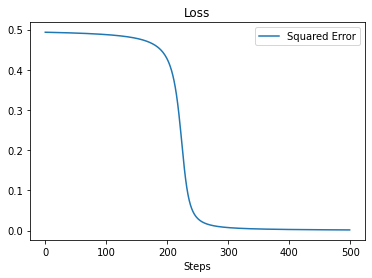

Text(0.5, 0, 'Steps')

(0.0, 1.2)

Text(0.5, 1.0, 'Prediction')

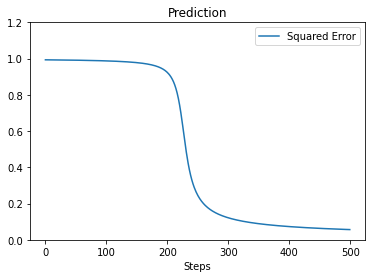

In [ ]:
func = 'SquaredError'

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.1
n = 500

z, yhat, L = forward(x,y, w_0, b_0, func)
        
g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x)
g_b = g_L_2_z(y, yhat, func) * g_z_2_b()
        
w = gradient_desc(w_0, g_w, lr)
b = gradient_desc(b_0, g_b, lr)

print("gradients of w and b: ")
g_w
g_b

print("w before and after: ", w_0, w)
print("b before and after: ", b_0, b)

Yhat2, C2 = train(x, y, w_0, b_0, func, lr, n)

plt.plot(range(n), C2, label="Squared Error")
plt.title('Loss')
plt.xlabel("Steps")
plt.legend()
plt.show()

plt.plot(range(n), Yhat2, label="Squared Error")
plt.legend()
plt.xlabel("Steps")
plt.ylim([0, 1.2])
plt.title('Prediction')
plt.show()

**Strategy 2**: Adaptive learning rate can also help here. The adaptive learning rate $\lambda = \frac{lr}{\sqrt{\sum{g^2 + \epsilon}}}$. When $g$ is small, the learning rate will become large. You can implement a exponential moving average to give more weights on recent gradients. A simple implentation is shown below. Here only the most recent 10 gradients are used to calculate the adpative learning rate.

In [ ]:
def adaptive_gradient_desc(v, dev, hist_dev, lr, eps=1e-8, steps = 10):
    
    l = min(steps, len(hist_dev))  # only consider gradients from 10 most recent steps
    
    adp_lr = lr/np.sqrt(np.sum(np.square(hist_dev[-l:]), axis = 0) + eps)
    
    return v - adp_lr * dev

def train(x, y, w0, b0, func, lr, n):
    w = w0
    b = b0
    C = []
    Gw = []
    Gb = []
    Yhat = []
    lam = 0.01
    for i in range(n):
        
         # adaptive learning rate
            
        z, yhat, L = forward(x, y, w, b, func) 
        
        Yhat.append(yhat)
        C.append(L)
        
        g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x) 
        g_b = g_L_2_z(y, yhat, func) * g_z_2_b()
        
        Gw.append(g_w)
        Gb.append(g_b)
        
        hist_gw = np.array(Gw)
        hist_gb = np.array(Gb)
        
        w = adaptive_gradient_desc(w, g_w, hist_gw, lr)
        b = adaptive_gradient_desc(b, g_b, hist_gb, lr)     
        
    return Yhat, C

4.995212417391547

0.9932752456683244

0.49329785682873506

gradients of w and b: 


[array([-0.00663461, -0.00331731, -0.00663461, -0.01326923])]

[0.006634613799030683]

w before and after:  [-2 -2  1 -2] [-1.98934078 -1.98967436  1.01065922 -1.98867957]
b before and after:  -1 -1.010659220518995


Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Steps')

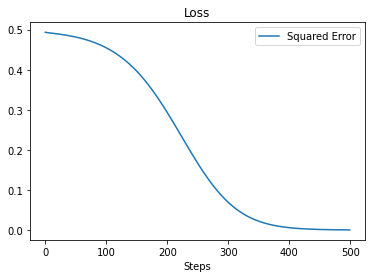

Text(0.5, 0, 'Steps')

(0.0, 1.2)

Text(0.5, 1.0, 'Prediction')

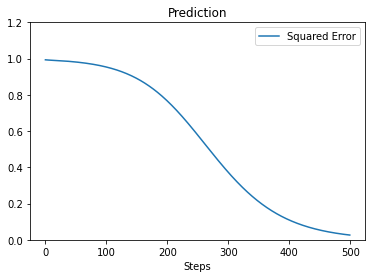

In [ ]:
func = 'SquaredError'

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500
Gw = []
Gb = []

z, yhat, L = forward(x, y, w, b, func)
z
yhat
L
        
g_w = g_L_2_z(y, yhat, func) * g_z_2_w(x) 
g_b = g_L_2_z(y, yhat, func) * g_z_2_b()

Gw.append(g_w)
Gb.append(g_b)

hist_gw = np.array(Gw)
hist_gb = np.array(Gb)

w = adaptive_gradient_desc(w, g_w, hist_gw, lr)
b = adaptive_gradient_desc(b, g_b, hist_gb, lr)   

print("gradients of w and b: ")
Gw
Gb

print("w before and after: ", w_0, w)
print("b before and after: ", b_0, b)

Yhat2, C2 = train(x, y, w_0, b_0, func, lr,n)

plt.plot(range(n), C2, label="Squared Error")
plt.title('Loss')
plt.xlabel("Steps")
plt.legend()
plt.show()

plt.plot(range(n), Yhat2, label="Squared Error")
plt.legend()
plt.xlabel("Steps")
plt.ylim([0, 1.2])
plt.title('Prediction')
plt.show()